
# Projet 1 : Analysez des données de systèmes éducatifs

## 1. Préambule

Une Start-up de la EdTech nommée Academy propose des formations en ligne pour des étudiants universitaires et des lycéens, 
son objectif actuel est l'expansion à l’international.

## 2. Mission

Dans le cadre du projet d’expansion à l’international de l’entreprise, réaliser une analyse exploratoire pour déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. 


## 3. Analyse pré-exploratoire

Les 5 jeux de données obtenus de la Banque mondiale à pré-explorer puis à exploiter sont :

3.1. EdStatsCountry

3.2. EdStatsCountrySeries

3.3. EdStatsData

3.4. EdStatsFootNote

3.5. EdStatsSeries


### 3.1. Le premier jeu de données : EdStatsCountry

In [1]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Importation du jeu de données EdStatsCountry

EdStatsCountry = pd.read_csv('EdStatsCountry.csv', sep=',')

In [3]:
# Afficher les 5 premières lignes du jeu de données EdStatsCountry

EdStatsCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [4]:
# Nombre de lignes et colonnes (taille du jeu de données EdStatsCountry)

EdStatsCountry.shape

(241, 32)

In [5]:
# Informations sur le jeu de données EdStatsCountry 

EdStatsCountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [6]:
# Nombre de doublons dans le jeu de données EdStatsCountry
 
EdStatsCountry.duplicated(keep=False).sum()

0

Text(0.5, 1.0, '% Valeurs manquantes dans le jeu de données EdStatsCountry pour chaqure variable')

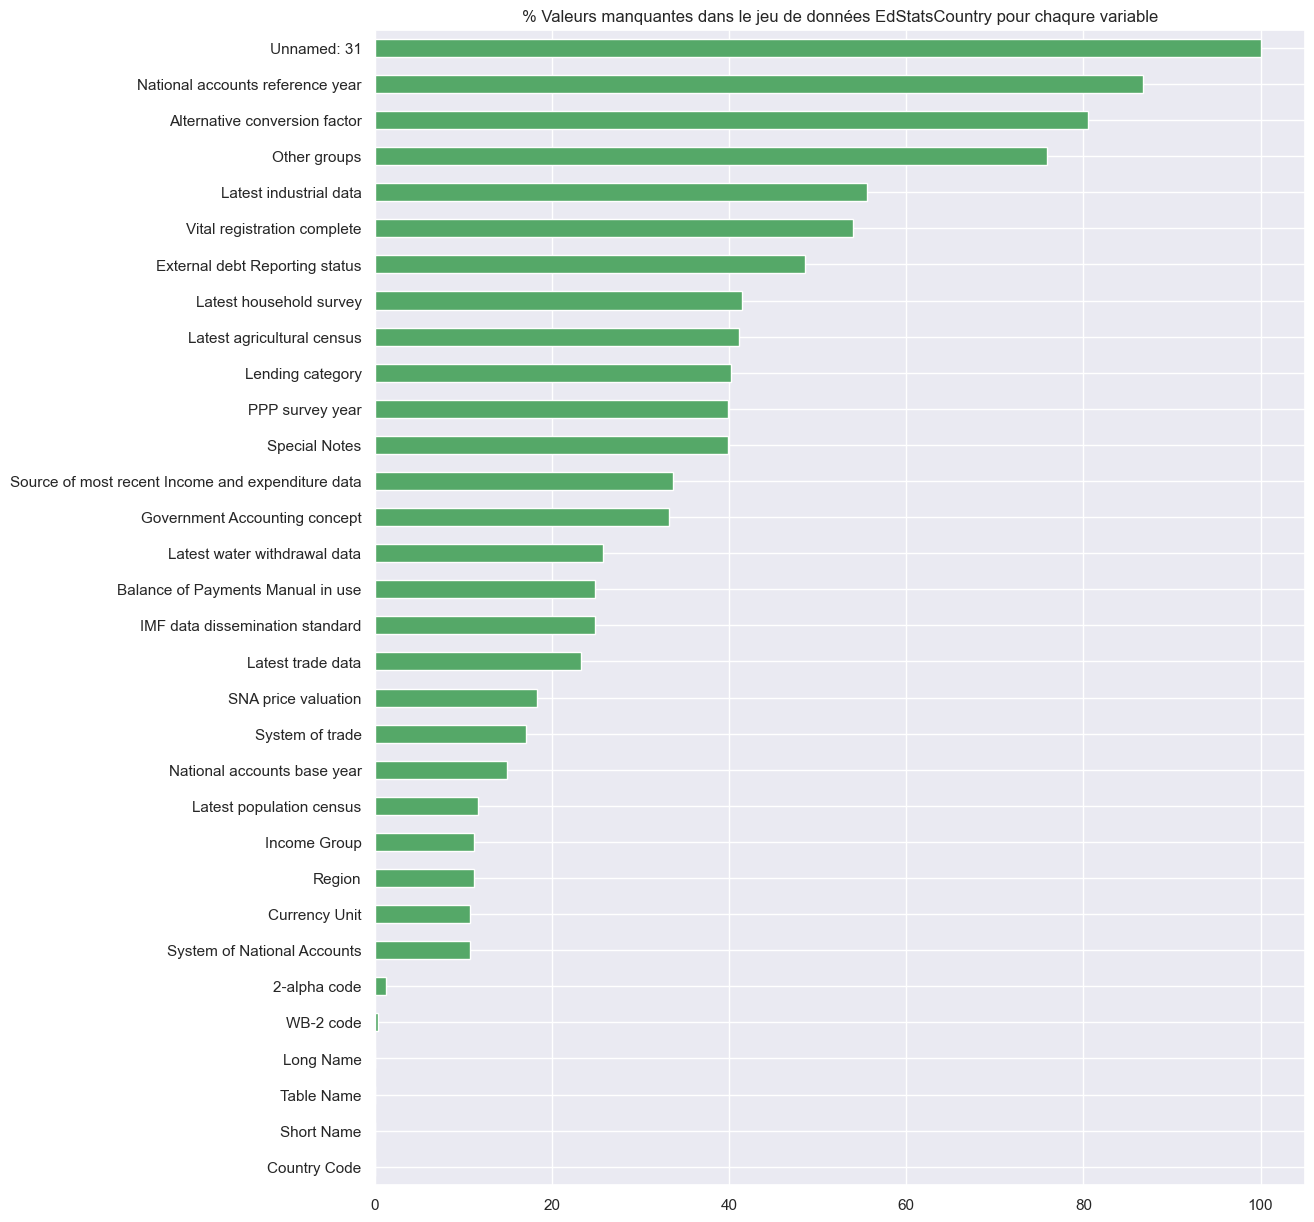

In [7]:
# Pourcentage de valeurs manquantes dans le jeu de données EdStatsCountry pour chaqure variable

sns.set_theme()
taille = EdStatsCountry.shape
valeurs_manquantes = EdStatsCountry.isna().sum()
valeurs_manquantes = valeurs_manquantes.sort_values(ascending=True)*100/taille[0]
figure = valeurs_manquantes.plot(kind='barh',figsize=(12, 15),color='g')
figure.set_title("% Valeurs manquantes dans le jeu de données EdStatsCountry pour chaqure variable")

In [8]:
# Nombre de pays par région

EdStatsCountry.groupby('Region')[['Short Name']].count()

,Short Name
Region,
East Asia & Pacific,36
Europe & Central Asia,57
Latin America & Caribbean,41
Middle East & North Africa,21
North America,3
South Asia,8
Sub-Saharan Africa,48


In [9]:
# Nombre de pays par niveau de revenu 

EdStatsCountry.groupby('Income Group')[['Short Name']].count()

,Short Name
Income Group,
High income: OECD,31
High income: nonOECD,44
Low income,34
Lower middle income,50
Upper middle income,55


Ce jeu de données regroupe des informations sur le code des pays, les noms des pays, les régions (East Asia & Pacific, Europe & Central Asia, Latin America & Caribbean, Middle East & North Africa, North America, South Asia	, Sub-Saharan Africa), groupe de revenus(High income: OECD, High income: nonOECD, Low income, Lower middle income, Upper middle income), des données économiques et des dates de référence des dernières études.
Il contient 241 lignes et 32 colonnes, aucun doublon detecté, la colonne Unnamed: 31 ne contient pas de valeur.


### 3.2.  2ème jeu de données : EdStatsCountrySeries

In [10]:
# Importation du jeu de données EdStatsCountrySeries


EdStatsCountrySeries = pd.read_csv('EdStatsCountry-Series.csv', sep=',')

In [11]:
# Afficher les 5 premières lignes du jeu de données EdStatsCountrySeries


EdStatsCountrySeries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [12]:
# Nombre de lignes et colonnes (taille du jeu de données EdStatsCountrySeries)

EdStatsCountrySeries.shape

(613, 4)

In [13]:
# Compter les doublons dans le jeu de données EdStatsCountrySeries


EdStatsCountrySeries.duplicated(keep=False).sum()

0

In [14]:
# types des données dans le jeu EdStatsCountrySeries


EdStatsCountrySeries.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [15]:
# Informations sur le jeu de données EdStatsCountrySeries


EdStatsCountrySeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


Text(0.5, 1.0, 'Somme des valeurs non_nulles dans le jeu de données EdStatsCountrySeries')

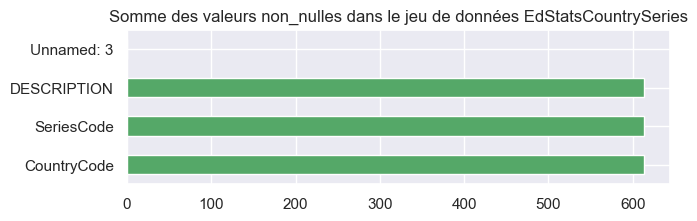

In [16]:
# Pourcentage de valeurs manquantes dans le jeu de données EdStatsCountrySeries pour chaqure variable


valeur_non_nulle = EdStatsCountrySeries.notnull().sum()
sns.set_theme()
figure = valeur_non_nulle.plot(kind='barh',figsize=(7, 2),color='g')
figure.set_title("Somme des valeurs non_nulles dans le jeu de données EdStatsCountrySeries", fontsize=12)

EdStatsCountrySeries : Ce jeu de données regroupe des informations sur des codes de pays et des indicateurs et la source des données des informations contenues dans EdStatsCountry. Il contient 613 lignes et 4 colonnes, aucun doublon detecté, la colonne Unnamed: 3 ne contient pas de valeur.

### 3.3.   3ème jeu de données : EdStatsData

In [17]:
# Importation du jeu de données EdStatsData


EdStatsData = pd.read_csv('EdStatsData.csv', sep=',')

In [18]:
# Afficher les 5 premières lignes du jeu de données EdStatsCountrySeries


EdStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Compter les doublons dans le jeu de données EdStatsData


EdStatsData.duplicated(keep=False).sum()

0

In [20]:
# Nombre de lignes et colonnes (taille du jeu de données EdStatsData)


EdStatsData.shape

(886930, 70)

In [21]:
# Informations sur le jeu de données EdStatsData


EdStatsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [22]:
# types des données dans le jeu EdStatsData


EdStatsData.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

Text(0.5, 1.0, 'Somme des valeurs non_nulles dans le jeu de données EdStatsData')

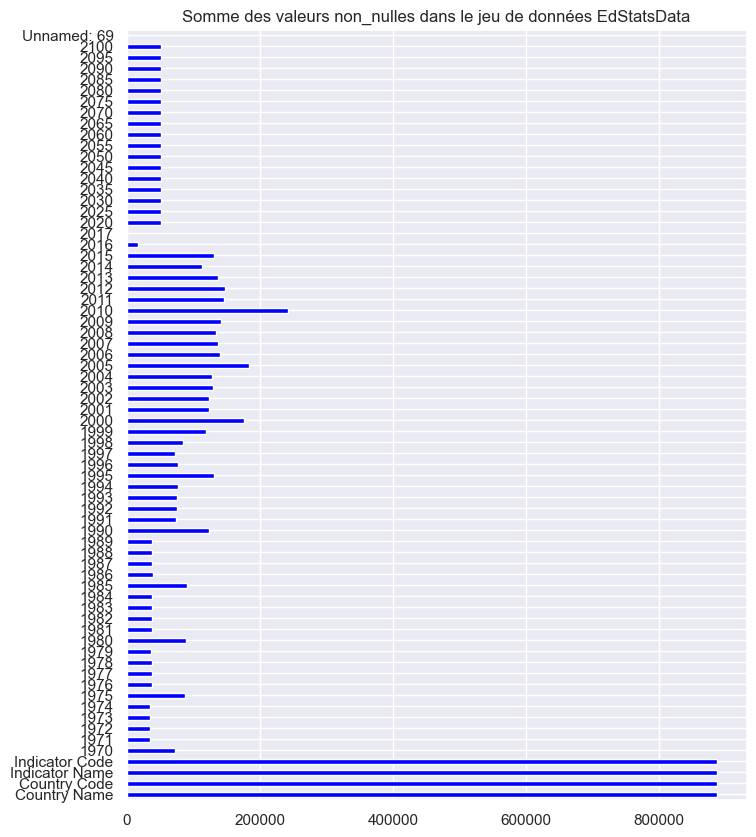

In [23]:
# Somme des valeurs non_nulles dans le jeu de données EdStatsData

valeur_non_nulle = EdStatsData.notnull().sum()
sns.set_theme()
figure = valeur_non_nulle.plot(kind='barh',figsize=(8, 10),color='blue')
figure.set_title("Somme des valeurs non_nulles dans le jeu de données EdStatsData", fontsize=12)

EdStatsData : Ce jeu de données regroupe des informations sur les noms des pays, des descriptions courtes des indicateurs, les codes des indicateurs et leurs valeurs pour les annéees entre 1970 et 2100. Il contient 886930 lignes et 70 colonnes, aucun doublon detecté, la colonne Unnamed: 69 ne contient pas de valeur.

### 3.4.   4ème jeu de données : EdStatsFootNote

In [24]:
# Importation du jeu de données EdStatsFootNote


EdStatsFootNote = pd.read_csv('EdStatsFootNote.csv', sep=',')

In [25]:
# Afficher les 5 premières lignes du jeu de données EdStatsFootNote


EdStatsFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [26]:
# Nombre de lignes et colonnes (taille du jeu de données EdStatsFootNote)


EdStatsFootNote.shape

(643638, 5)

In [27]:
# Compter les doublons dans le jeu de données EdStatsFootNote


EdStatsFootNote.duplicated(keep=False).sum()

0

In [28]:
# types des données dans le jeu EdStatsFootNote


EdStatsFootNote.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

In [29]:
# Informations sur le jeu de données EdStatsFootNote


EdStatsFootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


Text(0.5, 1.0, 'Somme des valeurs non_nulles dans le jeu de données EdStatsFootNote')

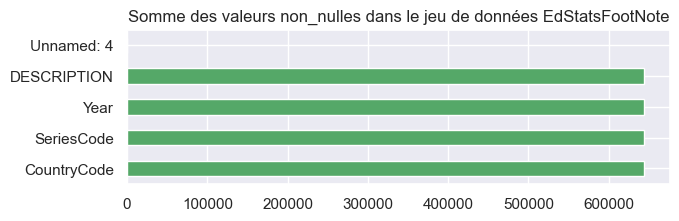

In [30]:
# Somme des valeurs non_nulles dans le jeu de données EdStatsFootNote

valeur_non_nulle = EdStatsFootNote.notnull().sum()
sns.set_theme()
figure = valeur_non_nulle.plot(kind='barh',figsize=(7, 2),color='g')
figure.set_title("Somme des valeurs non_nulles dans le jeu de données EdStatsFootNote", fontsize=12)

EdStatsFootNote : Ce jeu de données regroupe des informations sur les codes des pays et des indicateurs, la description et les annéees des données. Il contient 643638 lignes et 5 colonnes, aucun doublon detecté, la colonne Unnamed: 4 ne contient pas de valeur.

### 3.5.     5ème jeu de données : EdStatsSeries

In [31]:
# Importation du jeu de données EdStatsSeries


EdStatsSeries = pd.read_csv('EdStatsSeries.csv', sep=',')

In [32]:
# Afficher les 5 premières lignes du jeu de données EdStatsSeries


EdStatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Compter les doublons dans le jeu de données EdStatsSeries


EdStatsSeries.duplicated(keep=False).sum()

0

In [34]:
# Nombre de lignes et colonnes (taille du jeu de données EdStatsSeries)


EdStatsSeries.shape

(3665, 21)

In [35]:
# types des données dans le jeu EdStatsSeries


EdStatsSeries.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [36]:
# Somme de valeurs manquantes par variable dans le tableau EdStatsSeries


EdStatsSeries.isnull().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

In [37]:
# Informations sur le jeu de données EdStatsSeries


EdStatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

Text(0.5, 1.0, '% Valeurs manquantes dans le jeu de données EdStatsSeries pour chaqure variable')

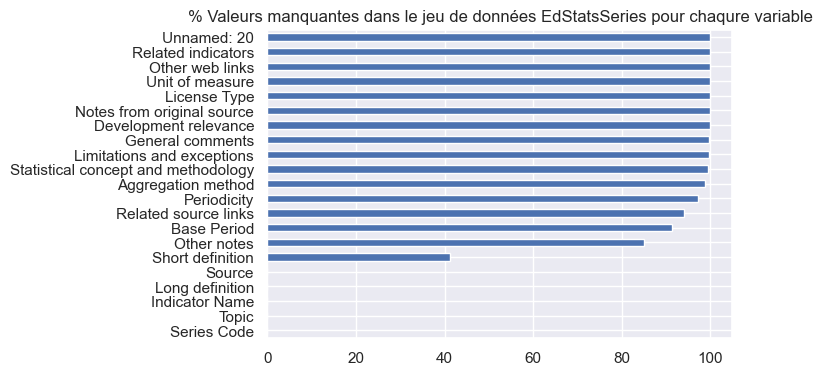

In [38]:
# Pourcentage de Valeurs manquantes dans le jeu de données EdStatsSeries pour chaqure variable

sns.set_theme()
valeurs2_manquantes = EdStatsSeries.isna().sum()
valeurs2_manquantes = valeurs2_manquantes.sort_values(ascending=True)*100/EdStatsSeries.shape[0]
figure = valeurs2_manquantes.plot(kind='barh',figsize=(6, 4),color='b')
figure.set_title("% Valeurs manquantes dans le jeu de données EdStatsSeries pour chaqure variable")

EdStatsSeries : Ce jeu de données regroupe des informations concernant principalement les définitions des indicatuers, leurs catégories, leurs unités de mesures, leurs methodes de caculs... Il contient 3665 lignes (nombres d'indicateurs) et 21 colonnes, aucun doublon detecté, 6 colonnes ne contiennent pas de valeur et beaucoup de valeurs manquante pour les autres.

## 4.  Exploitation du jeu de données

In [39]:
# grouper les 'series code' par 'topic' dans le jeu de données EdStatsSeries

EdStatsSeries_group = EdStatsSeries.groupby('Topic')[['Series Code']].count()

# Recupérer le jeu de données EdStatsSeries_group

EdStatsSeries_group

,Series Code
Topic,
Attainment,733
Background,2
EMIS,2
Early Child Development (SABER),12
Early Childhood Education,24
Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita,1
Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators,2
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,3
Economic Policy & Debt: Purchasing power parity,6


In [40]:
# Afficher les indicateurs du topic 'Infrastructure: Communications'

EdStatsSeries[EdStatsSeries['Topic']=='Infrastructure: Communications']['Series Code']

610    IT.CMP.PCMP.P2
611    IT.NET.USER.P2
Name: Series Code, dtype: object

On va selectionner : 
IT.NET.USER.P2 : Internet users (per 100 people)
et IT.CMP.PCMP.P2 : Personal computers (per 100 people)

In [41]:
# récupèrer toutes les valeurs uniques des codes des indicateurs en lien avec le topic 'Population'


EdStatsSeries[EdStatsSeries['Topic']=='Population']['Series Code'].unique()

array(['SP.POP.0305.FE.UN', 'SP.POP.0305.MA.UN', 'SP.POP.0305.TO.UN',
       'SP.POP.0406.FE.UN', 'SP.POP.0406.MA.UN', 'SP.POP.0406.TO.UN',
       'SP.POP.0509.FE.UN', 'SP.POP.0509.MA.UN', 'SP.POP.0509.TO.UN',
       'SP.POP.0510.FE.UN', 'SP.POP.0510.MA.UN', 'SP.POP.0510.TO.UN',
       'SP.POP.0511.FE.UN', 'SP.POP.0511.MA.UN', 'SP.POP.0511.TO.UN',
       'SP.POP.0609.FE.UN', 'SP.POP.0609.MA.UN', 'SP.POP.0609.TO.UN',
       'SP.POP.0610.FE.UN', 'SP.POP.0610.MA.UN', 'SP.POP.0610.TO.UN',
       'SP.POP.0611.FE.UN', 'SP.POP.0611.MA.UN', 'SP.POP.0611.TO.UN',
       'SP.POP.0612.FE.UN', 'SP.POP.0612.MA.UN', 'SP.POP.0612.TO.UN',
       'SP.POP.0709.FE.UN', 'SP.POP.0709.MA.UN', 'SP.POP.0709.TO.UN',
       'SP.POP.0710.FE.UN', 'SP.POP.0710.MA.UN', 'SP.POP.0710.TO.UN',
       'SP.POP.0711.FE.UN', 'SP.POP.0711.MA.UN', 'SP.POP.0711.TO.UN',
       'SP.POP.0712.FE.UN', 'SP.POP.0712.MA.UN', 'SP.POP.0712.TO.UN',
       'SP.POP.0713.FE.UN', 'SP.POP.0713.MA.UN', 'SP.POP.0713.TO.UN',
       'SP.POP.1014.

On va selectionner l'indicateur :   SP.POP.1524.TO.UN    : Population, ages 15-24, total

In [42]:
# récupérer toutes les valeurs uniques des indicateurs en lien avec le topic 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators'


EdStatsSeries[EdStatsSeries['Topic']=='Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators']['Series Code'].unique()

array(['NY.GDP.MKTP.CD', 'NY.GDP.PCAP.CD', 'NY.GNP.MKTP.CD'], dtype=object)

On va selectionner NY.GDP.PCAP.CD : Gross domestic product GDP per capita (current US$)

In [43]:
# récupèrer toutes les valeurs uniques des indicateurs en lien avec le topic 'Secondary'


EdStatsSeries[EdStatsSeries['Topic']=='Secondary']['Series Code'].unique()

array(['SE.ENR.PRSC.FM.ZS', 'SE.ENR.SECO.FM.ZS', 'SE.SEC.AGES',
       'SE.SEC.CMPT.LO.FE.ZS', 'SE.SEC.CMPT.LO.MA.ZS',
       'SE.SEC.CMPT.LO.ZS', 'SE.SEC.DURS', 'SE.SEC.DURS.LO ',
       'SE.SEC.DURS.UP', 'SE.SEC.ENRL', 'SE.SEC.ENRL.FE',
       'SE.SEC.ENRL.FE.VO.ZS', 'SE.SEC.ENRL.FE.ZS', 'SE.SEC.ENRL.GC',
       'SE.SEC.ENRL.GC.FE', 'SE.SEC.ENRL.GC.FE.ZS',
       'SE.SEC.ENRL.MA.VO.ZS', 'SE.SEC.ENRL.VO', 'SE.SEC.ENRL.VO.FE',
       'SE.SEC.ENRL.VO.FE.ZS', 'SE.SEC.ENRL.VO.ZS', 'SE.SEC.ENRR',
       'SE.SEC.ENRR.FE', 'SE.SEC.ENRR.LO', 'SE.SEC.ENRR.LO.FE',
       'SE.SEC.ENRR.LO.MA', 'SE.SEC.ENRR.MA', 'SE.SEC.ENRR.UP',
       'SE.SEC.ENRR.UP.FE ', 'SE.SEC.ENRR.UP.MA', 'SE.SEC.NENR',
       'SE.SEC.NENR.FE', 'SE.SEC.NENR.MA', 'SE.SEC.PRIV.ZS',
       'SE.SEC.PROG.FE.ZS', 'SE.SEC.PROG.MA.ZS', 'SE.SEC.PROG.ZS',
       'UIS.AFR.SCHBSP.2.PU.MIXTOIL', 'UIS.AFR.SCHBSP.2.PU.WELEC',
       'UIS.AFR.SCHBSP.2.PU.WNIELEC', 'UIS.AFR.SCHBSP.2.PU.WNIPOWAT',
       'UIS.AFR.SCHBSP.2.PU.WNITOIL', 'UIS.A

Dans cette liste on va selectionner l'indicateur UIS.E.3 : Enrollment in upper secondary education, both sexes (number)


In [44]:
# récupèrer toutes les valeurs uniques des indicateurs en lien avec le topic 'Tertiary'

EdStatsSeries[EdStatsSeries['Topic']=='Tertiary']['Series Code'].unique()

array(['SE.ENR.TERT.FM.ZS', 'SE.SCH.LIFE', 'SE.SCH.LIFE.FE',
       'SE.SCH.LIFE.MA', 'SE.TER.CMPL.FE.ZS', 'SE.TER.CMPL.MA.ZS',
       'SE.TER.CMPL.ZS', 'SE.TER.ENRL', 'SE.TER.ENRL.FE',
       'SE.TER.ENRL.FE.ZS', 'SE.TER.ENRR', 'SE.TER.ENRR.FE',
       'SE.TER.ENRR.MA', 'SE.TER.GRAD', 'SE.TER.GRAD.AG.FE.ZS',
       'SE.TER.GRAD.AG.ZS', 'SE.TER.GRAD.ED.FE.ZS', 'SE.TER.GRAD.ED.ZS',
       'SE.TER.GRAD.EN.FE.ZS', 'SE.TER.GRAD.EN.ZS', 'SE.TER.GRAD.FE',
       'SE.TER.GRAD.FE.AG.ZS', 'SE.TER.GRAD.FE.ED.ZS',
       'SE.TER.GRAD.FE.EN.ZS', 'SE.TER.GRAD.FE.HL.ZS',
       'SE.TER.GRAD.FE.HU.ZS', 'SE.TER.GRAD.FE.OT.ZS',
       'SE.TER.GRAD.FE.SC.ZS', 'SE.TER.GRAD.FE.SS.ZS',
       'SE.TER.GRAD.FE.SV.ZS', 'SE.TER.GRAD.FE.ZS',
       'SE.TER.GRAD.HL.FE.ZS', 'SE.TER.GRAD.HL.ZS',
       'SE.TER.GRAD.HU.FE.ZS', 'SE.TER.GRAD.HU.ZS',
       'SE.TER.GRAD.OT.FE.ZS', 'SE.TER.GRAD.OT.ZS',
       'SE.TER.GRAD.SC.FE.ZS', 'SE.TER.GRAD.SC.ZS',
       'SE.TER.GRAD.SS.FE.ZS', 'SE.TER.GRAD.SS.ZS',
       'SE.TER

On va selectionner les indicateurs : 
SE.TER.ENRL  : Enrollment in tertiary education, all programmes, both sexes (number)
et UIS.E.4      : Enrollment in post-secondary non-tertiary education, both sexes (number)

In [45]:
# Créer un dataframe Indicateurs qui contient seulement les codes des indicateurs et la définition de chaque code

Indicateurs = pd.DataFrame(
           {"Indicateur" : EdStatsSeries['Series Code'],
            "Définition" : EdStatsSeries['Long definition'],
           })

In [46]:
# Afficher les 5 premières lignes du jeu de données Indicateurs


Indicateurs.head()

,Indicateur,Définition
0,BAR.NOED.1519.FE.ZS,Percentage of female population age 15-19 with...
1,BAR.NOED.1519.ZS,Percentage of population age 15-19 with no edu...
2,BAR.NOED.15UP.FE.ZS,Percentage of female population age 15+ with n...
3,BAR.NOED.15UP.ZS,Percentage of population age 15+ with no educa...
4,BAR.NOED.2024.FE.ZS,Percentage of female population age 20-24 with...


In [47]:
# On va créer une liste des indicateurs qui peuvent être utiles pour répondre à la problématique de l’entreprise.
# Récupérer les définitions des indicateurs
Liste_indicateurs = ['SP.POP.1524.TO.UN', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2', 'UIS.E.3', 'UIS.E.4', 'SE.TER.ENRL', 'NY.GDP.PCAP.CD']
Indicateurs[Indicateurs['Indicateur'].isin(Liste_indicateurs)]

,Indicateur,Définition
610,IT.CMP.PCMP.P2,Personal computers are self-contained computer...
611,IT.NET.USER.P2,Internet users are individuals who have used t...
1662,NY.GDP.PCAP.CD,GDP per capita is gross domestic product divid...
2332,SE.TER.ENRL,The total number of students enrolled at publi...
2506,SP.POP.1524.TO.UN,"Population, ages 15-24, total is the total pop..."
2825,UIS.E.3,Total number of students enrolled in public an...
2835,UIS.E.4,Total number of students enrolled in public an...


En utilisant les dataframes 'Indicateurs' et EdStatsSeries_group, les sites http://datatopics.worldbank.org/education/ et https://datatopics.worldbank.org/education/indicators on a pu selectionner une liste de 7 indicateurs qui peuvent être utiles pour répondre à la problématique de l’entreprise, on va regrouper ces indicateurs en 4 catégories :



Tranche d’âge 

	
	SP.POP.1524.TO.UN        Population, ages 15-24, total
    

Éducation 

    UIS.E.4                     Enrollment in post-secondary non-tertiary education, both sexes (number)
    UIS.E.3                  Enrollment in upper secondary education, both sexes (number)
	SE.TER.ENRL              Enrollment in tertiary education, all programmes, both sexes (number)
	

Économie

	NY.GDP.PCAP.CD Gross domestic product GDP per capita (current US$). : PIB par habitant
    
    
Utilisation de l’internet :

    IT.NET.USER.P2            Internet users (per 100 people)
    IT.CMP.PCMP.P2            Personal computers (per 100 people)

Text(0, 0.5, 'Année')

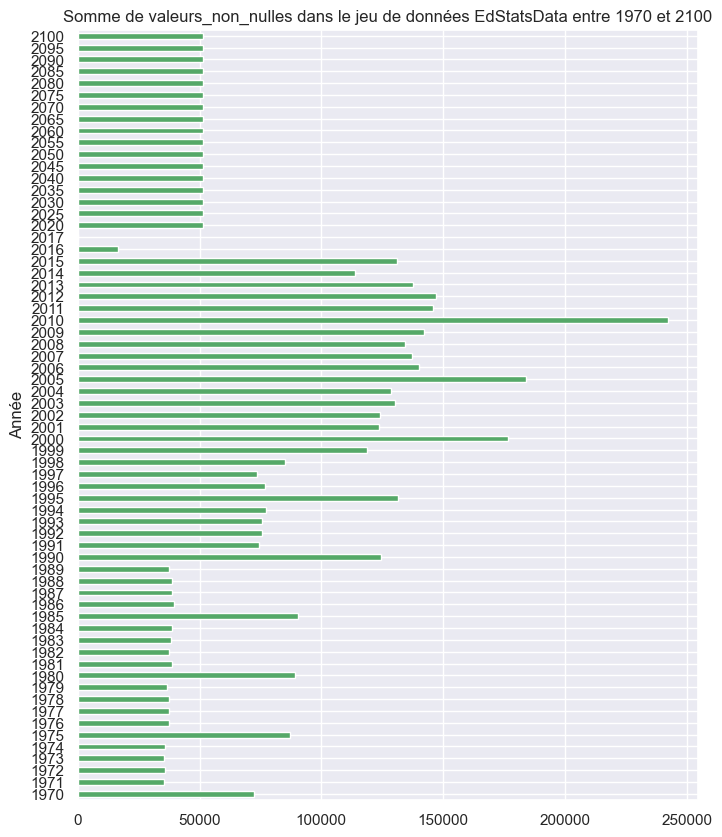

In [48]:
# Somme de valeurs_non_nulles dans le jeu de données EdStatsData entre 1970 et 2100

valeur_non_nulle = EdStatsData.loc[:,'1970':'2100'].notnull().sum()
sns.set_theme()
figure = valeur_non_nulle.plot(kind='barh',figsize=(8, 10),color='g')
figure.set_title("Somme de valeurs_non_nulles dans le jeu de données EdStatsData entre 1970 et 2100", fontsize=12)
plt.ylabel("Année", fontsize=12)

In [49]:
# On va selectionner les années entre 2010 qui contient plus de données non nulles et l'année 2015, à partir de l'année 2016 les données ne sont plus exploitable. 
# On va nommer ce dataframe Newdata
# on peut selectionner les colonnes qui nous interessent seulement mais on prèfère supprimer par ordre d'éliminations les colonnes qui ne sont pas utiles

# On commence par supprimer les colonnes des années avant 2010

Newdata = EdStatsData.drop(EdStatsData.loc[:, '1970':'2009'].columns, axis=1)

# On va supprimer les colonnes des années après 2010

Newdata = Newdata.drop(Newdata.loc[:,'2016':'2100'].columns, axis=1)

# On va supprimer la colonnes 'Unnamed: 69' qui ne contient pas de valeur


Newdata = Newdata.drop(['Unnamed: 69'], axis=1)

# On va supprimer les colonnes ''Country Code' et 'Indicator Name' également

Newdata = Newdata.drop(columns =['Country Code', 'Indicator Name'])

In [50]:
# Afficher les 5 premières lignes du jeu de données Newdata

Newdata.head()

,Country Name,Indicator Code,2010,2011,2012,2013,2014,2015
0,Arab World,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,SE.PRM.TENR,85.211998,85.24514,86.101669,85.51194,85.320152,NaN


Text(0.5, 1.0, 'Somme des valeurs non_nulles dans le jeu de données Newdata')

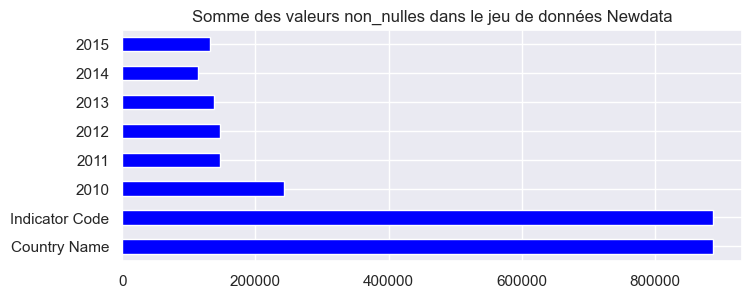

In [51]:
# Somme des valeurs non_nulles dans le jeu de données Newdata

valeur_non_nulle = Newdata.notnull().sum()
sns.set_theme()
figure = valeur_non_nulle.plot(kind='barh',figsize=(8, 3),color='blue')
figure.set_title("Somme des valeurs non_nulles dans le jeu de données Newdata", fontsize=12)

Text(0.5, 1.0, '% Valeurs manquantes dans le jeu de données Newdata pour chaqure variable')

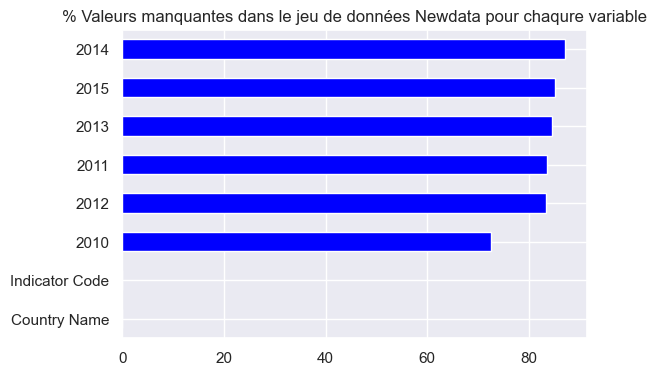

In [52]:
# Pourcentage de Valeurs manquantes dans le jeu de données Newdata pour chaqure variable

sns.set_theme()
taille = Newdata.shape
valeurs_manquantes = Newdata.isna().sum()
valeurs_manquantes = valeurs_manquantes.sort_values(ascending=True)*100/taille[0]
figure = valeurs_manquantes.plot(kind='barh',figsize=(6, 4),color='blue')
figure.set_title("% Valeurs manquantes dans le jeu de données Newdata pour chaqure variable")

In [53]:
# Afficher la liste des indicateurs

Liste_indicateurs

['SP.POP.1524.TO.UN',
 'IT.NET.USER.P2',
 'IT.CMP.PCMP.P2',
 'UIS.E.3',
 'UIS.E.4',
 'SE.TER.ENRL',
 'NY.GDP.PCAP.CD']

In [54]:
# On va créer un nouveau dataframe nommée data_indicateur dans lequel on va selectionner les données des indicateurs déjà selectionnés 


data_indicateur = Newdata[Newdata['Indicator Code'].isin(Liste_indicateurs)]

In [55]:
# Afficher les 5 premières et dernières lignes du jeu de données data_indicateur

data_indicateur

,Country Name,Indicator Code,2010,2011,2012,2013,2014,2015
1171,Arab World,UIS.E.4,2.485272e+05,2.202545e+05,2.058710e+05,3.115771e+05,3.293756e+05,NaN
1204,Arab World,SE.TER.ENRL,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06,NaN
1214,Arab World,UIS.E.3,1.064478e+07,1.162018e+07,1.202761e+07,1.202161e+07,1.199598e+07,NaN
1245,Arab World,NY.GDP.PCAP.CD,6.032962e+03,7.005480e+03,7.571402e+03,7.715999e+03,NaN,NaN
1375,Arab World,IT.NET.USER.P2,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN
...,...,...,...,...,...,...,...,...
884479,Zimbabwe,UIS.E.3,NaN,NaN,4.810060e+05,4.905220e+05,NaN,NaN
884510,Zimbabwe,NY.GDP.PCAP.CD,7.199795e+02,8.409499e+02,9.681639e+02,1.026388e+03,1.031105e+03,1.033416e+03
884640,Zimbabwe,IT.NET.USER.P2,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,2.274282e+01
885349,Zimbabwe,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Nouvelle colonne nommée 'median2010_2015' qui contient les valeurs 'mediane' entre les années 2010 et 2015 pour chaque pays

data_indicateur['median2010_2015'] = data_indicateur.loc[:, '2010':'2015'].median(axis=1)

/var/folders/47/jf50ppr146l7xm_wqy7ffcfr0000gn/T/ipykernel_2438/3018289523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_indicateur['median2010_2015'] = data_indicateur.loc[:, '2010':'2015'].median(axis=1)


In [57]:
# Afficher les 5 premières lignes du jeu de données data_indicateur

data_indicateur.head()

,Country Name,Indicator Code,2010,2011,2012,2013,2014,2015,median2010_2015
1171,Arab World,UIS.E.4,2.485272e+05,2.202545e+05,2.058710e+05,3.115771e+05,3.293756e+05,NaN,2.485272e+05
1204,Arab World,SE.TER.ENRL,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06,NaN,9.147083e+06
1214,Arab World,UIS.E.3,1.064478e+07,1.162018e+07,1.202761e+07,1.202161e+07,1.199598e+07,NaN,1.199598e+07
1245,Arab World,NY.GDP.PCAP.CD,6.032962e+03,7.005480e+03,7.571402e+03,7.715999e+03,NaN,NaN,7.288441e+03
1375,Arab World,IT.NET.USER.P2,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,3.186099e+01


In [58]:
# Pivoter les indicateurs vers les colonnes  

data_2010_2015 = data_indicateur.loc[:, ['Country Name','Indicator Code','median2010_2015']].pivot_table(index='Country Name', columns='Indicator Code')

In [59]:
# Afficher les 10 premières lignes du jeu de données data_2010_2015


data_2010_2015.head(10)

median2010_2015                             \
Indicator Code       IT.NET.USER.P2 NY.GDP.PCAP.CD SE.TER.ENRL   
Country Name                                                     
Afghanistan                5.677273     607.803337    180189.0   
Albania                   55.927980    4330.348002    160683.0   
Algeria                   20.350000    5449.419549   1227875.0   
American Samoa                  NaN   11594.302369         NaN   
Andorra                   90.217212   40178.032680       499.5   
Angola                     7.700000    4448.631438    218679.0   
Antigua and Barbuda       60.700000   12356.083345      1170.0   
Arab World                31.860993    7288.440972   9147083.0   
Argentina                 57.850000   12848.307742   2726557.0   
Armenia                   39.700000    3651.370278    118236.0   

                                                              
Indicator Code      SP.POP.1524.TO.UN     UIS.E.3    UIS.E.4  
Country Name                                                  
Afghanistan                 6686512.0    881415.0   90700.00  
Albania                      588256.0    151937.0    1889.00  
Algeria                     6879732.0   1319508.0        NaN  
American Samoa                    NaN         NaN        NaN  
Andorra                           NaN      1221.0     182.00  
Angola                      4019872.0    293454.0        NaN  
Antigua and Barbuda               NaN      2644.5     915.00  
Arab World                        NaN  11995984.0  248527.25  
Argentina                   6883394.5   1668415.5        NaN  
Armenia                      515953.5     97080.0        NaN

In [60]:
# Afficher les colonnes du jeu de données data_2010_2015 correctement 


data_median = data_2010_2015['median2010_2015']

In [61]:
# réinitialiser l'index du jeu de données data_median

Data_median_2010_2015 = data_median.reset_index()

In [62]:
# Afficher les 5 premières et dernières lignes du jeu de données Data_median_2010_2015


Data_median_2010_2015

Indicator Code,Country Name,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,UIS.E.3,UIS.E.4
0,Afghanistan,5.677273,607.803337,180189.0,6686512.0,881415.0,90700.0
1,Albania,55.927980,4330.348002,160683.0,588256.0,151937.0,1889.0
2,Algeria,20.350000,5449.419549,1227875.0,6879732.0,1319508.0,NaN
3,American Samoa,NaN,11594.302369,NaN,NaN,NaN,NaN
4,Andorra,90.217212,40178.032680,499.5,NaN,1221.0,182.0
...,...,...,...,...,...,...,...
235,West Bank and Gaza,45.000000,2826.487423,213954.0,964151.5,149325.0,555.5
236,World,35.613134,10500.561001,197940912.0,NaN,242879936.0,8868758.0
237,"Yemen, Rep.",18.723250,1411.373020,269814.0,5698273.0,640809.0,NaN
238,Zambia,14.434100,1689.775142,56219.5,2889610.5,NaN,NaN


Text(0.5, 1.0, 'Somme des valeurs non_nulles dans le jeu de données Data_median_2010_2015')

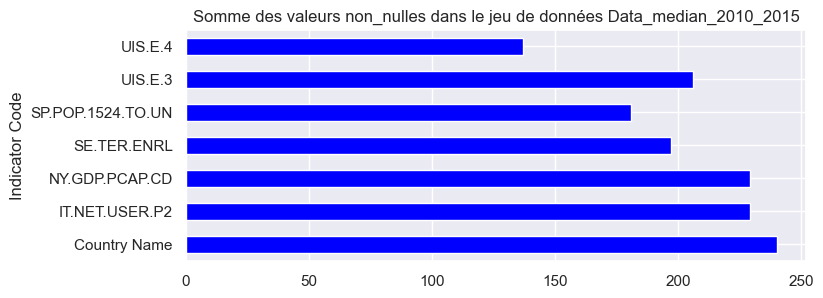

In [63]:
# Somme des valeurs non_nulles dans le jeu de données Data_median_2010_2015

valeur_non_nulle = Data_median_2010_2015.notnull().sum()
sns.set_theme()
figure = valeur_non_nulle.plot(kind='barh',figsize=(8, 3),color='blue')
figure.set_title("Somme des valeurs non_nulles dans le jeu de données Data_median_2010_2015", fontsize=12)


L'indicateur UIS.E.4 contient beaucoup de valeurs manquantes on va garder le UIS.E.3 seulement pour l'enseignement secondaire 

In [64]:
# supprimer la colonne UIS.E.4

Data_median_2010_2015 = Data_median_2010_2015.drop(['UIS.E.4'], axis=1)

# Afficher les 5 premières et dernières lignes du jeu de données Data_median_2010_2015

Data_median_2010_2015

Indicator Code,Country Name,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,UIS.E.3
0,Afghanistan,5.677273,607.803337,180189.0,6686512.0,881415.0
1,Albania,55.927980,4330.348002,160683.0,588256.0,151937.0
2,Algeria,20.350000,5449.419549,1227875.0,6879732.0,1319508.0
3,American Samoa,NaN,11594.302369,NaN,NaN,NaN
4,Andorra,90.217212,40178.032680,499.5,NaN,1221.0
...,...,...,...,...,...,...
235,West Bank and Gaza,45.000000,2826.487423,213954.0,964151.5,149325.0
236,World,35.613134,10500.561001,197940912.0,NaN,242879936.0
237,"Yemen, Rep.",18.723250,1411.373020,269814.0,5698273.0,640809.0
238,Zambia,14.434100,1689.775142,56219.5,2889610.5,NaN


In [65]:
# On va selectionner les pays à revenu élevé c'est à dire les pays à 'High income: OECD' et 'High income: nonOECD'

Country_income1 = EdStatsCountry[EdStatsCountry['Income Group'] == 'High income: OECD']['Short Name'].tolist()

Country_income2 = EdStatsCountry[EdStatsCountry['Income Group'] == 'High income: nonOECD']['Short Name'].tolist()

Country_income = Country_income1 + Country_income2

Data_median_2010_2015 = Data_median_2010_2015[Data_median_2010_2015['Country Name'].isin(Country_income)]

In [66]:
# Afficher les 5 premières et dernières lignes du jeu de données Data_median_2010_2015

Data_median_2010_2015

Indicator Code,Country Name,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,UIS.E.3
4,Andorra,90.217212,40178.032680,4.995000e+02,NaN,1.221000e+03
6,Antigua and Barbuda,60.700000,12356.083345,1.170000e+03,NaN,2.644500e+03
10,Aruba,76.450000,24798.330391,1.782500e+03,13849.0,3.970000e+03
11,Australia,81.470597,62229.854706,1.364203e+06,2922326.0,1.079568e+06
12,Austria,80.324397,49643.541782,3.988614e+05,992151.0,3.698416e+05
...,...,...,...,...,...,...
221,Turks and Caicos Islands,NaN,NaN,1.455000e+02,NaN,7.460000e+02
225,United Arab Emirates,86.499996,41287.273868,1.271675e+05,712270.0,1.376700e+05
226,United Kingdom,88.662049,42257.423513,2.479197e+06,7921820.0,3.080622e+06
227,United States,72.345000,52118.574622,2.020017e+07,45263493.5,1.173632e+07


Il nous reste 66 pays et régions dans le dataset Data_median_2010_2015

## 5.  Création d'un score global à partir des 5 indicateurs 


On va essayer de créer des scores par indicateur afin de classer les pays avec un fort potentiel de clients.

In [67]:
# Afficher les 5 premières lignes du jeu de données Data_median_2010_2015

Data_median_2010_2015.head()

Indicator Code,Country Name,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,UIS.E.3
4,Andorra,90.217212,40178.032680,4.995000e+02,NaN,1.221000e+03
6,Antigua and Barbuda,60.700000,12356.083345,1.170000e+03,NaN,2.644500e+03
10,Aruba,76.450000,24798.330391,1.782500e+03,13849.0,3.970000e+03
11,Australia,81.470597,62229.854706,1.364203e+06,2922326.0,1.079568e+06
12,Austria,80.324397,49643.541782,3.988614e+05,992151.0,3.698416e+05


In [68]:
# Création d'un score pour chaque indicateur (entre 0 et 1)

Data_median_2010_2015['Score_PIB'] = Data_median_2010_2015['NY.GDP.PCAP.CD']/Data_median_2010_2015['NY.GDP.PCAP.CD'].max()

Data_median_2010_2015['Score_Internet'] = Data_median_2010_2015['IT.NET.USER.P2']/Data_median_2010_2015['IT.NET.USER.P2'].max()

Data_median_2010_2015['Score_inscri_supérieur'] = Data_median_2010_2015['SE.TER.ENRL']/Data_median_2010_2015['SE.TER.ENRL'].max()

Data_median_2010_2015['Score_inscri_second_supérieur'] = Data_median_2010_2015['UIS.E.3']/Data_median_2010_2015['UIS.E.3'].max()

Data_median_2010_2015['Score_Population_15_24'] = Data_median_2010_2015['SP.POP.1524.TO.UN']/Data_median_2010_2015['SP.POP.1524.TO.UN'].max()


/var/folders/47/jf50ppr146l7xm_wqy7ffcfr0000gn/T/ipykernel_2438/1960852362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_median_2010_2015['Score_PIB'] = Data_median_2010_2015['NY.GDP.PCAP.CD']/Data_median_2010_2015['NY.GDP.PCAP.CD'].max()
/var/folders/47/jf50ppr146l7xm_wqy7ffcfr0000gn/T/ipykernel_2438/1960852362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_median_2010_2015['Score_Internet'] = Data_median_2010_2015['IT.NET.USER.P2']/Data_median_2010_2015['IT.NET.USER.P2'].max()
/var/fo

In [69]:
# Afficher les 5 premières et dernières lignes du jeu de données Data_median_2010_2015


Data_median_2010_2015

Indicator Code,Country Name,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,UIS.E.3,Score_PIB,Score_Internet,Score_inscri_supérieur,Score_inscri_second_supérieur,Score_Population_15_24
4,Andorra,90.217212,40178.032680,4.995000e+02,NaN,1.221000e+03,0.246167,0.936074,0.000025,0.000104,NaN
6,Antigua and Barbuda,60.700000,12356.083345,1.170000e+03,NaN,2.644500e+03,0.075705,0.629810,0.000058,0.000225,NaN
10,Aruba,76.450000,24798.330391,1.782500e+03,13849.0,3.970000e+03,0.151937,0.793228,0.000088,0.000338,0.000306
11,Australia,81.470597,62229.854706,1.364203e+06,2922326.0,1.079568e+06,0.381276,0.845321,0.067534,0.091985,0.064563
12,Austria,80.324397,49643.541782,3.988614e+05,992151.0,3.698416e+05,0.304161,0.833428,0.019745,0.031513,0.021919
...,...,...,...,...,...,...,...,...,...,...,...
221,Turks and Caicos Islands,NaN,NaN,1.455000e+02,NaN,7.460000e+02,NaN,NaN,0.000007,0.000064,NaN
225,United Arab Emirates,86.499996,41287.273868,1.271675e+05,712270.0,1.376700e+05,0.252963,0.897505,0.006295,0.011730,0.015736
226,United Kingdom,88.662049,42257.423513,2.479197e+06,7921820.0,3.080622e+06,0.258907,0.919938,0.122732,0.262486,0.175016
227,United States,72.345000,52118.574622,2.020017e+07,45263493.5,1.173632e+07,0.319326,0.750636,1.000000,1.000000,1.000000


In [70]:
# Création d'un score global à partir des 5 indicateurs(score moyen) et l'ajouter dans Data_median_2010_2015

Data_median_2010_2015['score moyen'] = Data_median_2010_2015.loc[:, 'Score_PIB':'Score_Population_15_24'].mean(axis=1)

/var/folders/47/jf50ppr146l7xm_wqy7ffcfr0000gn/T/ipykernel_2438/1126059470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_median_2010_2015['score moyen'] = Data_median_2010_2015.loc[:, 'Score_PIB':'Score_Population_15_24'].mean(axis=1)


In [71]:
# Afficher les 5 premières et dernières lignes du jeu de données Data_median_2010_2015


Data_median_2010_2015

Indicator Code,Country Name,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,UIS.E.3,Score_PIB,Score_Internet,Score_inscri_supérieur,Score_inscri_second_supérieur,Score_Population_15_24,score moyen
4,Andorra,90.217212,40178.032680,4.995000e+02,NaN,1.221000e+03,0.246167,0.936074,0.000025,0.000104,NaN,0.295592
6,Antigua and Barbuda,60.700000,12356.083345,1.170000e+03,NaN,2.644500e+03,0.075705,0.629810,0.000058,0.000225,NaN,0.176449
10,Aruba,76.450000,24798.330391,1.782500e+03,13849.0,3.970000e+03,0.151937,0.793228,0.000088,0.000338,0.000306,0.189180
11,Australia,81.470597,62229.854706,1.364203e+06,2922326.0,1.079568e+06,0.381276,0.845321,0.067534,0.091985,0.064563,0.290136
12,Austria,80.324397,49643.541782,3.988614e+05,992151.0,3.698416e+05,0.304161,0.833428,0.019745,0.031513,0.021919,0.242153
...,...,...,...,...,...,...,...,...,...,...,...,...
221,Turks and Caicos Islands,NaN,NaN,1.455000e+02,NaN,7.460000e+02,NaN,NaN,0.000007,0.000064,NaN,0.000035
225,United Arab Emirates,86.499996,41287.273868,1.271675e+05,712270.0,1.376700e+05,0.252963,0.897505,0.006295,0.011730,0.015736,0.236846
226,United Kingdom,88.662049,42257.423513,2.479197e+06,7921820.0,3.080622e+06,0.258907,0.919938,0.122732,0.262486,0.175016,0.347816
227,United States,72.345000,52118.574622,2.020017e+07,45263493.5,1.173632e+07,0.319326,0.750636,1.000000,1.000000,1.000000,0.813992


In [72]:
# Informations sur le jeu de données Data_median_2010_2015


Data_median_2010_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 4 to 229
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   66 non-null     object 
 1   IT.NET.USER.P2                 62 non-null     float64
 2   NY.GDP.PCAP.CD                 61 non-null     float64
 3   SE.TER.ENRL                    55 non-null     float64
 4   SP.POP.1524.TO.UN              49 non-null     float64
 5   UIS.E.3                        57 non-null     float64
 6   Score_PIB                      61 non-null     float64
 7   Score_Internet                 62 non-null     float64
 8   Score_inscri_supérieur         55 non-null     float64
 9   Score_inscri_second_supérieur  57 non-null     float64
 10  Score_Population_15_24         49 non-null     float64
 11  score moyen                    66 non-null     float64
dtypes: float64(11), object(1)
memory usage: 6.7+ KB


Data_median_2010_2015 : ce jeu de données contient 66 lignes et 12 colonnes.

Text(0.5, 1.0, '% Valeurs manquantes pour chaqure variable')

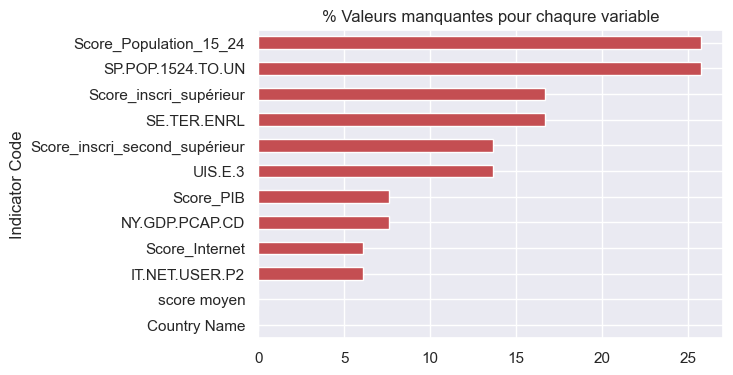

In [73]:
# Pourcentage de Valeurs manquantes dans le jeu de données Data_median_2010_2015 pour chaqure variable

sns.set_theme()
taille = Data_median_2010_2015.shape
valeurs_manquantes = Data_median_2010_2015.isna().sum()
valeurs_manquantes = valeurs_manquantes.sort_values(ascending=True)*100/taille[0]
figure = valeurs_manquantes.plot(kind='barh',figsize=(6, 4),color='r')
figure.set_title("% Valeurs manquantes pour chaqure variable")

On remarque que le pourcentage des valeurs manquantes dans le jeu de données Data_median_2010_2015 est non négligeable ce qui peut influencer le classement final des pays avec un fort potentiel de clients, on préfère garder seulement les pays qui sont bien présentés par les 5 indicateurs.

In [74]:
# On va supprimer les lignes qui contiennent au moins une valeur manquante NaN

data = Data_median_2010_2015.dropna()


In [75]:
# Afficher le jeu de données data

data

Indicator Code,Country Name,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,UIS.E.3,Score_PIB,Score_Internet,Score_inscri_supérieur,Score_inscri_second_supérieur,Score_Population_15_24,score moyen
10,Aruba,76.450000,24798.330391,1.782500e+03,13849.0,3.970000e+03,0.151937,0.793228,0.000088,0.000338,0.000306,0.189180
11,Australia,81.470597,62229.854706,1.364203e+06,2922326.0,1.079568e+06,0.381276,0.845321,0.067534,0.091985,0.064563,0.290136
12,Austria,80.324397,49643.541782,3.988614e+05,992151.0,3.698416e+05,0.304161,0.833428,0.019745,0.031513,0.021919,0.242153
15,Bahrain,89.000020,23169.122429,3.890100e+04,130603.0,3.969800e+04,0.141955,0.923445,0.001926,0.003382,0.002885,0.214719
17,Barbados,71.500000,16294.356399,1.282650e+04,39481.5,8.147000e+03,0.099834,0.741868,0.000635,0.000694,0.000872,0.168781
19,Belgium,81.890098,45661.626399,4.831000e+05,1256191.0,5.287070e+05,0.279764,0.849674,0.023916,0.045049,0.027753,0.245231
40,Chile,56.525000,14761.535099,1.146392e+06,2913846.0,9.917140e+05,0.090443,0.586491,0.056752,0.084500,0.064375,0.176512
48,Croatia,64.343787,13486.607066,1.596555e+05,526669.0,1.821945e+05,0.082631,0.667617,0.007904,0.015524,0.011636,0.157062
51,Cyprus,63.072334,28429.561461,3.217550e+04,129970.5,3.245700e+04,0.174185,0.654425,0.001593,0.002766,0.002871,0.167168
52,Czech Republic,73.770204,19776.314850,4.323975e+05,1166152.0,4.361490e+05,0.121168,0.765423,0.021406,0.037162,0.025764,0.194185


In [76]:
# Informations sur le jeu de données data


data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 10 to 229
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   45 non-null     object 
 1   IT.NET.USER.P2                 45 non-null     float64
 2   NY.GDP.PCAP.CD                 45 non-null     float64
 3   SE.TER.ENRL                    45 non-null     float64
 4   SP.POP.1524.TO.UN              45 non-null     float64
 5   UIS.E.3                        45 non-null     float64
 6   Score_PIB                      45 non-null     float64
 7   Score_Internet                 45 non-null     float64
 8   Score_inscri_supérieur         45 non-null     float64
 9   Score_inscri_second_supérieur  45 non-null     float64
 10  Score_Population_15_24         45 non-null     float64
 11  score moyen                    45 non-null     float64
dtypes: float64(11), object(1)
memory usage: 4.6+ KB


In [77]:
# Classement des 20 premiers pays en se basant sur le score moyen et afficher et scores dans les colonnes d'un nouveau jeu de données nommé data_classement

data_classement = data.sort_values('score moyen', ascending=False)[['Country Name', 'Score_PIB', 'Score_Internet', 'Score_inscri_supérieur', 'Score_inscri_second_supérieur', 'Score_Population_15_24', 'score moyen']].iloc[:10]

In [78]:

# Afficher le jeu de données data_classement

data_classement

Indicator Code,Country Name,Score_PIB,Score_Internet,Score_inscri_supérieur,Score_inscri_second_supérieur,Score_Population_15_24,score moyen
227,United States,0.319326,0.750636,1.000000,1.000000,1.000000,0.813992
105,Japan,0.260277,0.870091,0.191224,0.313274,0.272050,0.381383
226,United Kingdom,0.258907,0.919938,0.122732,0.262486,0.175016,0.347816
78,Germany,0.277537,0.863887,0.144167,0.225412,0.199671,0.342135
129,Luxembourg,0.675106,0.963528,0.000284,0.001914,0.001400,0.328446
164,Norway,0.606291,0.984160,0.012219,0.020822,0.014184,0.327535
73,France,0.255468,0.847493,0.113678,0.222953,0.167297,0.321377
209,Switzerland,0.516653,0.889931,0.013599,0.027432,0.021271,0.293777
11,Australia,0.381276,0.845321,0.067534,0.091985,0.064563,0.290136
156,Netherlands,0.312205,0.951411,0.038952,0.063665,0.044260,0.282099


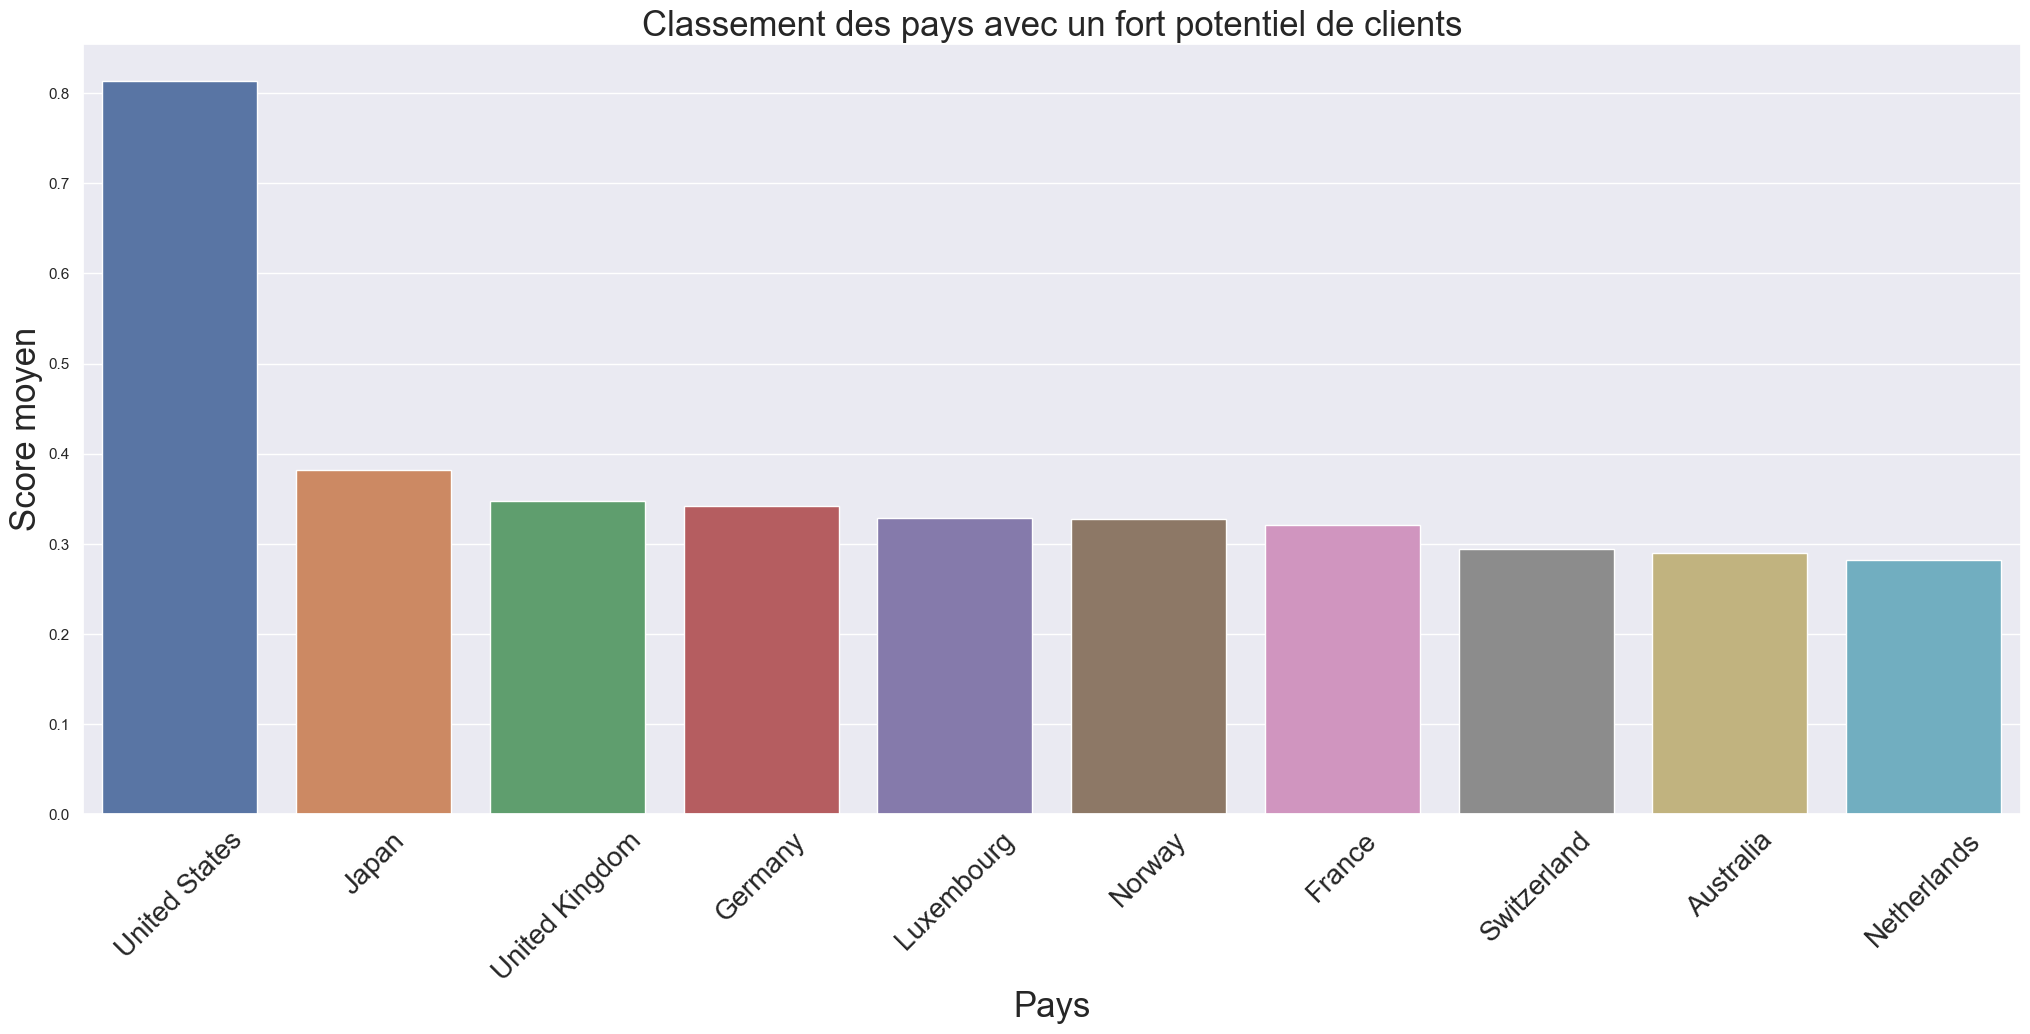

In [79]:
# Classement des 10 premiers pays en se basant sur le score moyen

sns.set_theme()
plt.figure(figsize=(25,10))
sns.barplot(data=data_classement, x='Country Name', y='score moyen', ci=None)
plt.title("Classement des pays avec un fort potentiel de clients", fontname= 'Arial', fontsize=25)
plt.ylabel("Score moyen", fontsize=25)
plt.xticks(rotation=45, fontsize=20)
plt.xlabel("Pays", fontsize=25)
plt.show()

## 6. Conclusion

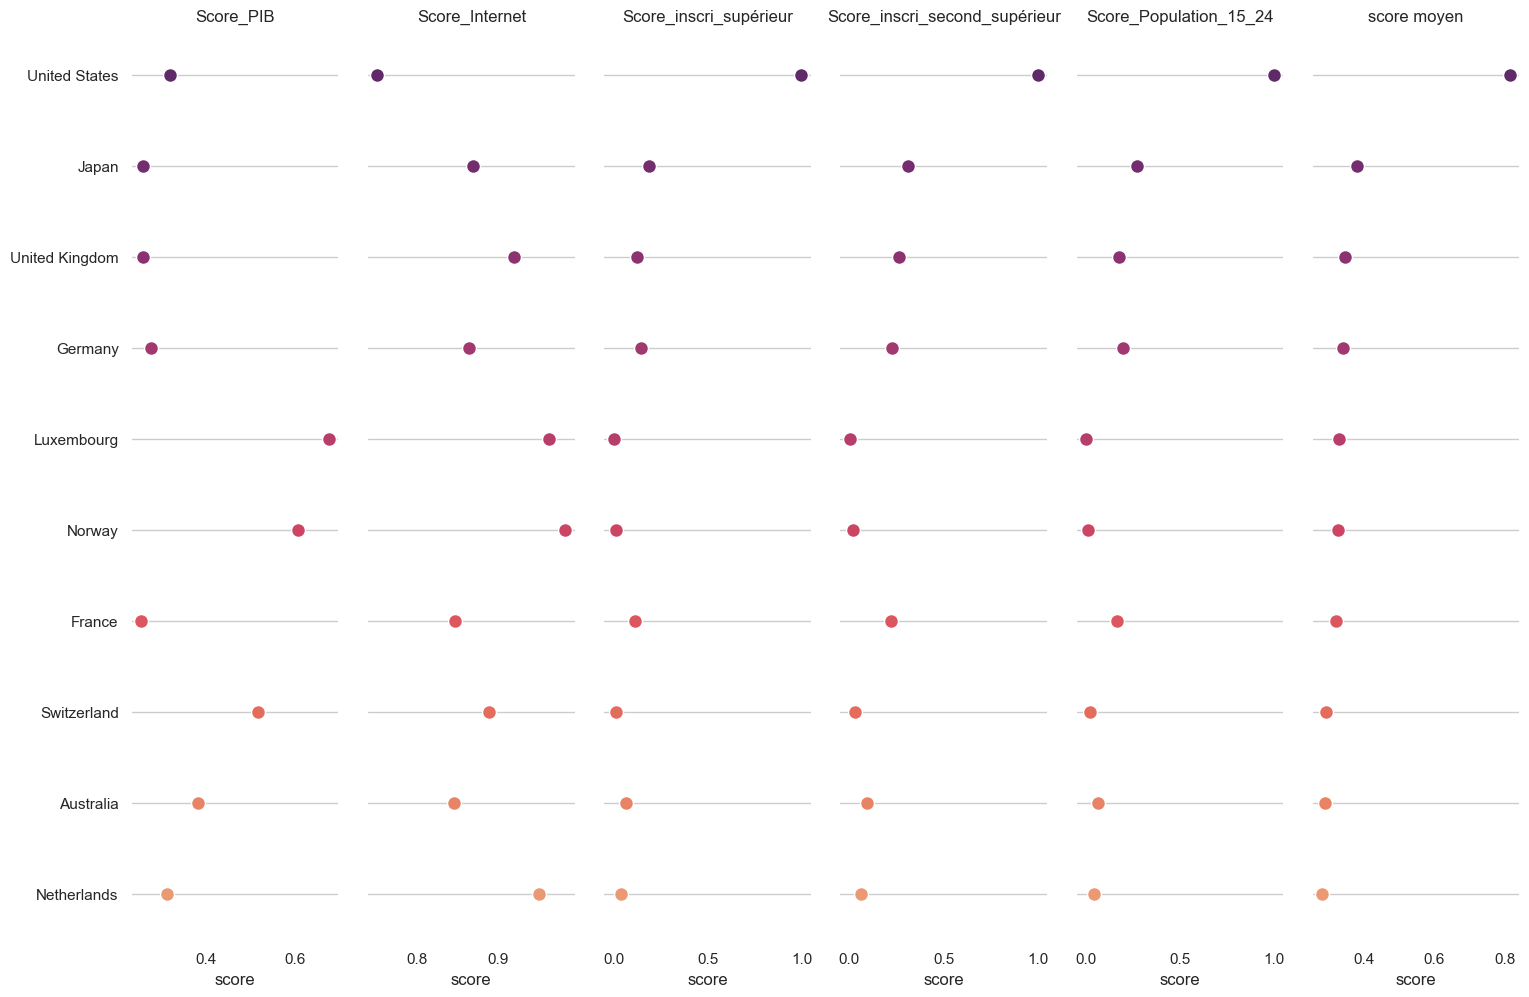

In [80]:
# Classement des 10 premiers pays; affichage des 5 scores et le score moyen pour chaque pays.


sns.set_theme(style="whitegrid")

g = sns.PairGrid(data_classement.sort_values("score moyen", ascending=False),
                 x_vars=data.columns[6:12], y_vars=['Country Name'],
                 height=10, aspect=.25)


g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")


g.set(xlabel="score", ylabel="")


titles = ["Score_PIB", "Score_Internet", "Score_inscri_supérieur",
          "Score_inscri_second_supérieur", "Score_Population_15_24", "score moyen"]

for ax, title in zip(g.axes.flat, titles):

    ax.set(title=title)

    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)



Pour conclure, ce jeu de données présente plusieurs indicateurs économique, démographiques, éducatifs et numériques qui peuvent être utiles pour répondre à la problématique de l’entreprise et informer les décisions d'ouverture vers de nouveaux pays et donc permettre d’informer le projet d’expansion. 

Tous les pays du monde sont présentés dans ce jeu de données obtenus de la banque mondiale, néanmoins ce dataset contient beaucoup de valeurs manquantes ce qui peut compliquer l'étude et le suivi de l'évolution du potentiel de clients. 

Les meilleurs pays dans le classement obtenu après l'analyse exploratoire, pour le projet d’expansion à l’international de l’entreprise sont présentés ci-dessus, basé sur le score moyen établit entre 2010 qui contient plus de données jusqu'à 2015 car à partir de 2016 les données ne sont malheureusement plus exploitable.

Les 10 meilleurs pays ont un score PIB proche sauf quelques pays comme Luxembourg et Norvège, un bon score de l'utilisation d'internet est obtenu par la majorité de ces pays. 

Pour l'inscription en secondaire-supérieur et la population cible 15-24 ans les scores sont proches et ne dépassent pas 50% sauf les Etats-Unis qui a un bon score. 
Le score moyen place les Etats-Unis largement en tête du classement. 

Le top 10 des pays dans le classement :

1- Les Etats-Unis 2- Le Japan 3- Le Royaume-Uni 4- Allemagne 5- Luxembourg 6- Norvège 7- France 8- Suisse 9- Australie 10- Pays-Bas.

L'entreprise doit opérer en priorité dans ces premiers pays caractérisés par un fort potentiel de clients principalement dans l'utilisation de l'internet, des revenus suffisants et un bon score également concernant l'inscription dans l'enseignement supérieur et secondaire en fonction de la tranche cible d'âge de la tranche d'âges.
